# Emotion Analysis

### Import Dependencies

In [1]:
import pandas as pd
import nltk
import string

from collections import Counter

import matplotlib.pyplot as plt

### Reading CSV File

In [47]:
test_df = pd.read_csv("Concat_ML_Data/third_debate.csv")
test_df.head()

,tweet,replies_count,retweets_count,likes_count,candidate,tweet_length,Subjectivity,Polarity,Sentiment
0,Shut down travel sent PPE across the country ...,0,0,0,Biden,41,0.339815,0.015741,Positive
1,Trump 2020,0,0,1,Biden,2,0.000000,0.000000,Neutral
2,Yes it is Trump 2020 go to sleepy Jose,9,1,55,Biden,9,0.000000,0.000000,Neutral
3,It time to start thinking about others people...,0,0,0,Biden,47,0.433333,0.037500,Positive
4,25 yrs ago Times were different,0,0,1,Biden,6,0.600000,0.000000,Neutral


In [48]:
# Separating entire dataset to for Trump and Biden
biden_sentiment=test_df[(test_df['candidate']=='Biden')]
trump_sentiment=test_df[(test_df['candidate']=='Trump')]

In [49]:
# Keeping the tweet columns for both datasets
biden_sentiment=pd.DataFrame(biden_sentiment, columns=['tweet'])
trump_sentiment=pd.DataFrame(trump_sentiment, columns=['tweet'])

### Pre-processing for Emotion Analysis

In [78]:
# Converting all text to lowercase
trump_sentiment['tweet']=trump_sentiment['tweet'].str.lower()

In [79]:
# Creating Function to tokenize words in tweet columns
def tokenized_words(row):
    tweet = row['tweet']
    tokens = nltk.word_tokenize(tweet)
    token_wds = [word for word in tokens if word.isalpha()]
    return token_wds

In [80]:
# Applying tokeninzed_words function to dataset
trump_sentiment['t_words']=trump_sentiment.apply(tokenized_words, axis=1)
trump_sentiment.head()

,tweet,t_words
315431,charitable only with other people money the r...,"[charitable, only, with, other, people, money,..."
315432,trump 2020,[trump]
315433,you do realize that least racist is still rac...,"[you, do, realize, that, least, racist, is, st..."
315434,these are great achievements by it is not one ...,"[these, are, great, achievements, by, it, is, ..."
315435,the democrats have created russian like oliga...,"[the, democrats, have, created, russian, like,..."


### Import Stopwords from NLTK

In [81]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

In [83]:
# Creating Function to remove stop words in tweet column
def remove_stop_wds(row):
    t_words=row['t_words']
    meaningful_words = [word for word in t_words if not word in stops]
    return (meaningful_words)

In [84]:
# Applying remove_stop_wds function to dataset
trump_sentiment['final_wds']=trump_sentiment.apply(remove_stop_wds, axis=1)
trump_sentiment.head()

,tweet,t_words,final_wds
315431,charitable only with other people money the r...,"[charitable, only, with, other, people, money,...","[charitable, people, money, rest, course, say,..."
315432,trump 2020,[trump],[trump]
315433,you do realize that least racist is still rac...,"[you, do, realize, that, least, racist, is, st...","[realize, least, racist, still, racist, right]"
315434,these are great achievements by it is not one ...,"[these, are, great, achievements, by, it, is, ...","[great, achievements, one, one, speaks, matter..."
315435,the democrats have created russian like oliga...,"[the, democrats, have, created, russian, like,...","[democrats, created, russian, like, oligarch, ..."


In [86]:
# Creating list of all meaningful words in the final_wds column
meaningful_list =[]
def meaningful_words(row):
    final_words=row['final_wds']
    for word in final_words:
        meaningful_list.append(word)
    return ('Complete')

In [87]:
# Applying meaningful_words function to get list of final words
trump_sentiment.apply(meaningful_words, axis=1)

315431    Complete
315432    Complete
315433    Complete
315434    Complete
315435    Complete
            ...   
851654    Complete
851655    Complete
851656    Complete
851657    Complete
851658    Complete
Length: 536228, dtype: object

### Performing Emotion Analysis

In [88]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in meaningful_list:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' sad': 52, ' happy': 48, ' fearful': 35, ' angry': 31, ' attracted': 26, ' powerless': 20, ' singled out': 15, ' hated': 14, ' attached': 13, ' cheated': 12, ' fearless': 12, ' anxious': 12, ' entitled': 11, ' belittled': 10, ' esteemed': 9, ' adequate': 9, ' loved': 8, ' alone': 8, ' lustful': 7, ' apathetic': 7, ' surprise': 6, ' bored': 5, ' independent': 5, ' codependent': 5, ' demoralized': 5, ' derailed': 4, ' free': 4, ' embarrassed': 3, ' average': 3, ' obsessed': 3, ' focused': 3, ' ecstatic': 3, ' lost': 3, ' safe': 2, ' burdened': 2})


In [90]:
# Creating lists from keys and values for w
x=list(w.keys())
y=list(w.values())

In [91]:
# Creating pandas dataframe from x and y lists
emotion_df = pd.DataFrame({
          "Emotion" : x,
          "Value": y})

emotion_df

,Emotion,Value
0,cheated,12
1,singled out,15
2,loved,8
3,attracted,26
4,sad,52
5,fearful,35
6,happy,48
7,angry,31
8,bored,5
9,esteemed,9


### Plotting Barplot for Emotions

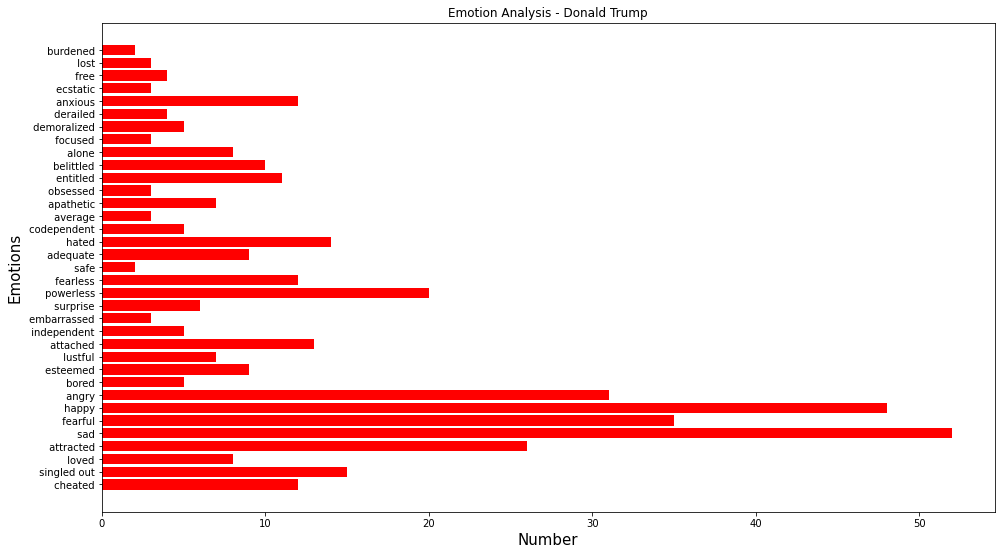

In [92]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.barh(emotion_df.Emotion, emotion_df.Value, color=['red'])
ax1.set_xlabel('Number', size=15)
ax1.set_ylabel('Emotions', size=15)
ax1.set_title('Emotion Analysis - Donald Trump')
# fig.autofmt_xdate()
plt.savefig('Images/Trump3D_emotions.png')
plt.show()

In [93]:
# Arranging the emotions by descending values
top_emotions_trump = emotion_df.sort_values(["Value"], ascending=False)
top_emotions_trump

,Emotion,Value
4,sad,52
6,happy,48
5,fearful,35
7,angry,31
3,attracted,26
15,powerless,20
1,singled out,15
19,hated,14
11,attached,13
0,cheated,12


In [94]:
# Creating table with top 10 Emotions
top10_emotions_trump = top_emotions_trump.head(10)
top10_emotions_trump

,Emotion,Value
4,sad,52
6,happy,48
5,fearful,35
7,angry,31
3,attracted,26
15,powerless,20
1,singled out,15
19,hated,14
11,attached,13
0,cheated,12


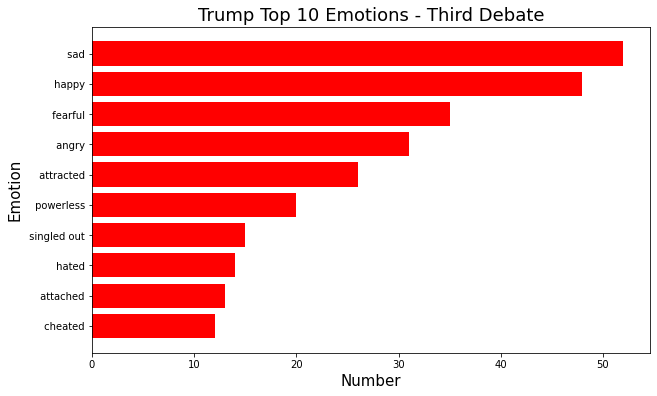

In [95]:
plt.figure(figsize=(10,6))

plt.barh('Emotion', 'Value',data=top10_emotions_trump, color=['red'])
plt.xlabel("Number", size=15)
plt.ylabel("Emotion", size=15)
plt.title("Trump Top 10 Emotions - Third Debate", size=18)
plt.gca().invert_yaxis()

plt.savefig("Images/Trump3D_top10_emotions.png")
plt.show()

In [96]:
# Bottom 10 Emotions
bottom10_emotions_trump = top_emotions_trump.tail(10)
bottom10_emotions_trump

,Emotion,Value
29,derailed,4
32,free,4
23,obsessed,3
13,embarrassed,3
21,average,3
27,focused,3
33,lost,3
31,ecstatic,3
17,safe,2
34,burdened,2


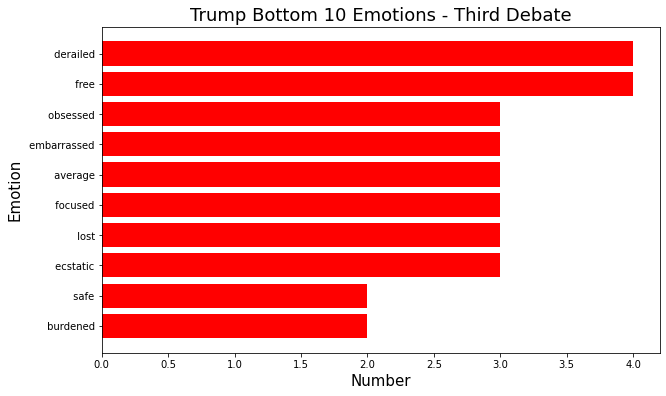

In [97]:
plt.figure(figsize=(10,6))

plt.barh('Emotion', 'Value',data=bottom10_emotions_trump, color=['red'])
plt.xlabel("Number", size=15)
plt.ylabel("Emotion", size=15)
plt.title("Trump Bottom 10 Emotions - Third Debate", size=18)
plt.gca().invert_yaxis()
plt.savefig("Images/Trump3D_bottom10_emotions.png")
plt.show()